In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from nlpdb import DB

In [4]:
db = DB()
res = db.custom_get('select * from id_rubric where characteristic is not null and is_deleted=0', ())

In [5]:
res[0]

('2_25380626_1539610_1540000',
 '25380626_1539610_1540000',
 2,
 'Сериал Троцкий ',
 'Поправка к сериалу',
 0,
 0)

In [6]:
columns=['idx', 'comment_id', 'rubric_id', 'characteristic', 'note', 'is_deleted', 'is_chefdoeuvre']
d = [dict(zip(columns, x)) for x in res]

In [7]:
df = DataFrame(d)

In [8]:
df.head()

,characteristic,comment_id,idx,is_chefdoeuvre,is_deleted,note,rubric_id
0,Сериал Троцкий,25380626_1539610_1540000,2_25380626_1539610_1540000,0,0,Поправка к сериалу,2
1,Аналогия сдачи Крыма с Б.М.,29534144_7533887_7535675,2_29534144_7533887_7535675,0,0,,2
2,Нейтрально,112510789_500477_500752,3_112510789_500477_500752,0,0,,3
3,Положительно,112510789_500477_501321,3_112510789_500477_501321,0,0,Акцент на заслугах большевиков (на просвещении...,3
4,Нейтрально,112510789_571170_571258,3_112510789_571170_571258,0,0,,3


In [9]:
df.groupby(['is_chefdoeuvre']).count()

,characteristic,comment_id,idx,is_deleted,note,rubric_id
is_chefdoeuvre,,,,,,
0,1719,1719,1719,1719,1719,1719
1,41,41,41,41,41,41


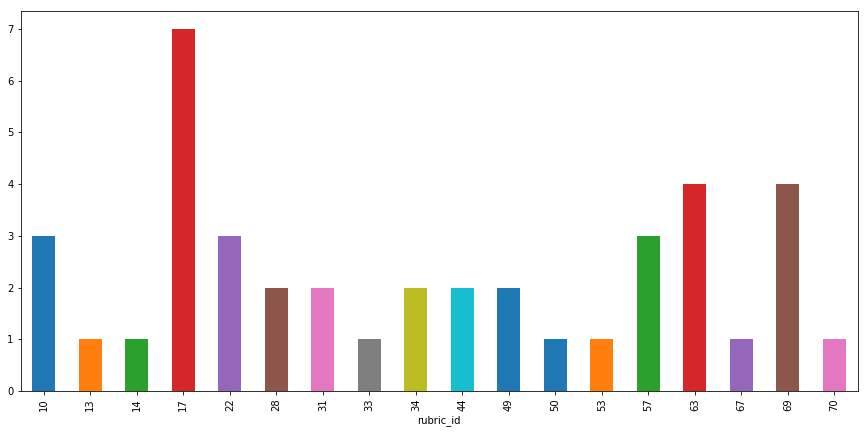

In [10]:
df.loc[df.is_chefdoeuvre==1].groupby(['rubric_id']).count().idx.plot(kind='bar', figsize=(15,7))
plt.savefig('figures\\chefdoeuvre_by_rubric')

In [11]:
df.groupby(['rubric_id', 'characteristic']).count()

comment_id  idx  \
rubric_id characteristic                                                        
2         Аналогия сдачи Крыма с Б.М.                                  1    1   
          Сериал Троцкий                                               1    1   
3         Аллегория на современные события                             6    6   
          Антисемитизм                                                 1    1   
          Большевики как антицерковный инструмент                     10   10   
          Негативная идентичность                                      4    4   
          Негативно                                                   31   31   
          Нейтрально                                                  54   54   
          Положительно                                                19   19   
          Современные политические дискуссии                          18   18   
          большевики - создатели украины                               2    2   
          дискредитация позиции оппонентов                             1    1   
          ирония над большевиками                                      1    1   
          ирония над националистическими клише                         1    1   
          обсуждение революции                                         1    1   
          репрессии большевиков                                        2    2   
          сравнение с большевиками для делегитимизации                 1    1   
8         Положительно к Троцкому                                      1    1   
          Троцкий - предатель, иностранный агент                       2    2   
          аллегория к современности                                    1    1   
          антисемитизм                                                 2    2   
          затрудняюсь                                                  1    1   
          конкретное обсуждение исторических событий                   2    2   
          негативная идентичность                                      3    3   
          негативно к Троцкому                                         9    9   
          нейтрально к Троцкому                                       32   32   
          о троцкистах                                                 1    1   
          обсуждение революции                                         1    1   
          обсуждение сегодняшней политики с историческими...           2    2   
          сериал Троцкий на 1 канале                                  14   14   
...                                                                  ...  ...   
69        современные политические дискуссии                           5    5   
70        Державность                                                  1    1   
          Затрудняюсь                                                 12   12   
          Какую партию в России не создавай - все равно К...           3    3   
          Мимо                                                         4    4   
          Негативно к КПСС и партии                                    9    9   
          Негативно к партийцам                                        2    2   
          Положительно к политикам, выходцам из КПСС                   1    1   
          Репрессии                                                    1    1   
          Слава КПСС!                                                  6    6   
          а какое отношение КПРФ, КПСС и СССР имеют к ком...           1    1   
          а что плохого в коммунизме до 85 года                        2    2   
          коммунистический взгляд на историю СССР                      3    3   
          критика государственников                                    1    1   
          критика западных политиков                                   1    1   
          критика памяти россиян и исторической политики               3    3   
          критика современной власти                                  12   12   
          ме

In [17]:
text = ' '.join(df.loc[df.rubric_id==3].characteristic.str.capitalize().tolist())

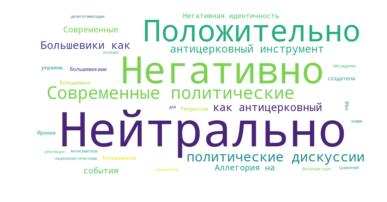

In [25]:
wordcloud = WordCloud(width=1200, height=600, margin=20, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.show()
plt.savefig('figures\\wordcloud_3.png')